In [309]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns

from sklearn import preprocessing
import math

# 2. Logistic Regression


# a. Dataset creation:

# i. Please create two binary class datasets (X,Y) of 1500 samples, one
# with 2 dimensional features, and another with 3 dimensional features.
# X ~ N(0,1)
# Y = 1 if σ (ßx) > = 0.5
# = 0 otherwise
# Assign β to some values within the range 1-3 before generating Y.

In [310]:
X_DS1 = pd.DataFrame()
np.random.seed(1)
X_DS1["x1"] = np.random.normal(0,1,1500)
X_DS1["x2"] = np.random.normal(0,1,1500)

In [311]:
print("X value for dataset 1 \n")
print(X_DS1)

X value for dataset 1 

            x1        x2
0     1.624345  1.301225
1    -0.611756 -0.312392
2    -0.528172 -0.271229
3    -1.072969  1.862913
4     0.865408 -0.642874
...        ...       ...
1495  0.196645 -0.771890
1496 -0.632590 -0.622657
1497 -0.209847 -0.150660
1498  1.897161 -1.400023
1499 -1.381391 -1.301066

[1500 rows x 2 columns]


In [312]:
np.random.seed(1)
B_DS1 = np.random.uniform(low=1,high=3,size=3)
print("Beta for dataset 1",B_DS1)

Beta for dataset 1 [1.83404401 2.44064899 1.00022875]


In [313]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [314]:
y_DS1 = sigmoid(B_DS1[0]+  B_DS1[1]*X_DS1["x1"] + B_DS1[2]*X_DS1["x2"])
y_DS1 = y_DS1 >= 0.5
y_DS1= y_DS1.astype(int)

print("y value for dataset 1 \n")
print(y_DS1)

y value for dataset 1 

0       1
1       1
2       1
3       1
4       1
       ..
1495    1
1496    0
1497    1
1498    1
1499    0
Length: 1500, dtype: int32


In [315]:
X_DS2 = pd.DataFrame()
np.random.seed(1)
X_DS2["x1"] = np.random.normal(0,1,1500)
X_DS2["x2"] = np.random.normal(0,1,1500)
X_DS2["x3"] = np.random.normal(0,1,1500)

In [316]:
print("X value for dataset 2 \n")
print(X_DS2)

X value for dataset 2 

            x1        x2        x3
0     1.624345  1.301225 -0.077107
1    -0.611756 -0.312392  0.207825
2    -0.528172 -0.271229  0.986196
3    -1.072969  1.862913  1.432756
4     0.865408 -0.642874  0.528258
...        ...       ...       ...
1495  0.196645 -0.771890  0.747622
1496 -0.632590 -0.622657  0.943634
1497 -0.209847 -0.150660 -0.425562
1498  1.897161 -1.400023  0.805778
1499 -1.381391 -1.301066  0.056853

[1500 rows x 3 columns]


In [317]:
np.random.seed(1)
B_DS2 = np.random.uniform(low=1,high=3,size=4)
print("Beta for dataset 2",B_DS2)

Beta for dataset 2 [1.83404401 2.44064899 1.00022875 1.60466515]


In [318]:
y_DS2 = sigmoid(B_DS2[0]+  B_DS2[1]*X_DS2["x1"] + B_DS2[2]*X_DS2["x2"] + B_DS2[3]*X_DS2["x3"])
y_DS2 = y_DS2 >= 0.5
y_DS2= y_DS2.astype(int)

print("y value for dataset 2 \n")
print(y_DS2)

y value for dataset 2 

0       1
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Length: 1500, dtype: int32


# ii. Create a train-test split of 80-20.

In [319]:
X_train_DS1,X_test_DS1,y_train_DS1,y_test_DS1 = train_test_split(X_DS1,y_DS1,test_size=0.2,random_state=1)
X_train_DS1.shape,X_test_DS1.shape,y_train_DS1.shape,y_test_DS1.shape

((1200, 2), (300, 2), (1200,), (300,))

# iii. Visualize the 1st dataset in 2-D plane and plot the same

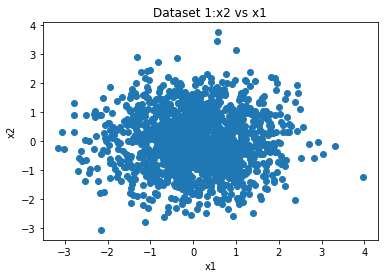

In [320]:
plt.scatter(X_DS1["x1"],X_DS1["x2"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dataset 1:x2 vs x1")
plt.show()

# iv. Perform feature normalisation of the dataset with 3 dimensional
# features

In [321]:
# We are performing Z-score Normalization hence using the sandard scalar

In [322]:
scaler = preprocessing.StandardScaler().fit(X_DS2)

In [323]:
X_scaled = scaler.transform(X_DS2)

In [324]:
X_DS2 =pd.DataFrame(X_scaled,columns= ["x1","x2","x3"])
print(X_DS2)

            x1        x2        x3
0     1.580369  1.332549 -0.094020
1    -0.666866 -0.291834  0.184065
2    -0.582865 -0.250396  0.943730
3    -1.130374  1.897985  1.379559
4     0.817653 -0.624520  0.496798
...        ...       ...       ...
1495  0.145561 -0.754398  0.710889
1496 -0.687803 -0.604168  0.902191
1497 -0.262955 -0.129022 -0.434100
1498  1.854543 -1.386721  0.767648
1499 -1.440332 -1.287104  0.036721

[1500 rows x 3 columns]


In [325]:
X_train_DS2,X_test_DS2,y_train_DS2,y_test_DS2 = train_test_split(X_DS2,y_DS2,test_size=0.2,random_state=1)
X_train_DS2.shape,X_test_DS2.shape,y_train_DS2.shape,y_test_DS2.shape

((1200, 3), (300, 3), (1200,), (300,))

# b. Modelling

# i. Use scikit learn library to train a Logistic regression model on both
# datasets.

In [326]:
logistic_reg_DS1 = LogisticRegression().fit(X_train_DS1, y_train_DS1)
print(logistic_reg_DS1.intercept_ ,logistic_reg_DS1.coef_)

[5.92920447] [[7.63175455 3.13291978]]


In [327]:
logistic_reg_DS2 = LogisticRegression().fit(X_train_DS2, y_train_DS2)
print(logistic_reg_DS2.intercept_ ,logistic_reg_DS2.coef_)

[5.62864176] [[6.8393741  2.72023572 4.60696515]]


# ii. Vary the following parameters and save the parameters for both
# datasets:

# 1. Regularization - L1, Tolerance - 1e-2, Solver - liblinear (say
# parameter P11, P12) {The first index (1 in P12 for e.g.) denotes the
# combination number and second index (2 in P12) denotes dataset number}

In [328]:
logistic_reg_DS1 = LogisticRegression(penalty='l1',tol=1e-2,solver='liblinear').fit(X_train_DS1, y_train_DS1)
p11 = np.concatenate((np.array(logistic_reg_DS1.intercept_),np.array(logistic_reg_DS1.coef_).flatten()),axis=0)
print("P11: ",p11)

P11:  [10.25080453 13.56802258  5.52142928]


In [329]:
logistic_reg_DS2 = LogisticRegression(penalty='l1',tol=1e-2,solver='liblinear').fit(X_train_DS2, y_train_DS2)
p12 = np.concatenate((np.array(logistic_reg_DS2.intercept_),np.array(logistic_reg_DS2.coef_).flatten()),axis=0)
print("P12: ",p12)

P12:  [ 8.85524638 10.93849647  4.36019475  7.3216342 ]


# 2. Regularization - L1, * Tolerance - 1e-5, Solver - liblinear (say
# parameter P21, P22)

In [330]:
logistic_reg_DS1 = LogisticRegression(penalty='l1',tol=1e-5,solver='liblinear').fit(X_train_DS1, y_train_DS1)
p21 = np.concatenate((np.array(logistic_reg_DS1.intercept_),np.array(logistic_reg_DS1.coef_).flatten()),axis=0)
print("P21: ",p21)

P21:  [12.04631312 15.94424392  6.50985958]


In [331]:
logistic_reg_DS2 = LogisticRegression(penalty='l1',tol=1e-5,solver='liblinear').fit(X_train_DS2, y_train_DS2)
p22 = np.concatenate((np.array(logistic_reg_DS2.intercept_),np.array(logistic_reg_DS2.coef_).flatten()),axis=0)
print("P22: ",p22)

P22:  [11.45538574 14.19541934  5.66188007  9.47316459]


# 3. Regularization - L2, Tolerance - 1e-2, Solver - newton-cg (say
# parameter P31, P32)

In [332]:
logistic_reg_DS1 = LogisticRegression(penalty='l2',tol=1e-2,solver='newton-cg').fit(X_train_DS1, y_train_DS1)
p31 = np.concatenate((np.array(logistic_reg_DS1.intercept_),np.array(logistic_reg_DS1.coef_).flatten()),axis=0)
print("P31: ",p31)

P31:  [5.92783149 7.63008964 3.13224632]


In [333]:
logistic_reg_DS2 = LogisticRegression(penalty='l2',tol=1e-2,solver='newton-cg').fit(X_train_DS2, y_train_DS2)
p32 = np.concatenate((np.array(logistic_reg_DS2.intercept_),np.array(logistic_reg_DS2.coef_).flatten()),axis=0)
print("P32: ",p32)

P32:  [5.62733998 6.83793767 2.7196447  4.60588948]


# 4. Regularization - L2, Tolerance - 1e-5, Solver - newton-cg (say
# parameter P41, P42)

In [334]:
logistic_reg_DS1 = LogisticRegression(penalty='l2',tol=1e-5,solver='newton-cg').fit(X_train_DS1, y_train_DS1)
p41 = np.concatenate((np.array(logistic_reg_DS1.intercept_),np.array(logistic_reg_DS1.coef_).flatten()),axis=0)
print("P41: ",p41)

P41:  [5.92920211 7.63175126 3.13291822]


In [335]:
logistic_reg_DS2 = LogisticRegression(penalty='l2',tol=1e-5,solver='newton-cg').fit(X_train_DS2, y_train_DS2)
p42 = np.concatenate((np.array(logistic_reg_DS2.intercept_),np.array(logistic_reg_DS2.coef_).flatten()),axis=0)
print("P42: ",p42)

P42:  [5.62863704 6.83936924 2.72023062 4.60696245]


# c. Metrics

# i. Use all the parameters (or models) [P*] to report mean accuracies
# and class-specific accuracies on the test sets for both the datasets in
# plot/table. Use the parameter names as distinguishing factors and clarify
# the notations.

In [336]:
y_pred_p11 = sigmoid(p11[0]+p11[1]*X_test_DS1["x1"]+p11[2]*X_test_DS1["x2"])
y_pred_p11 = y_pred_p11 >= 0.5
y_pred_p11= y_pred_p11.astype(int)
pred_vs_true_p11 = pd.DataFrame()
pred_vs_true_p11['pred'] = y_pred_p11
pred_vs_true_p11['true'] = y_test_DS1
print(pred_vs_true_p11)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [337]:
def meanAccuracy(pred_vs_true):
    correct = np.count_nonzero(pred_vs_true['pred'] == pred_vs_true['true'])
    total = pred_vs_true.shape[0]
    accuracy = correct/total
    return accuracy

def class1Accuracy(pred_vs_true):
    pred_vs_true = pred_vs_true[pred_vs_true['true'] == 1]
    correct = np.count_nonzero(pred_vs_true['pred'] == pred_vs_true['true'])
    total = pred_vs_true.shape[0]
    accuracy = correct/total
    return accuracy

def class0Accuracy(pred_vs_true):
    pred_vs_true = pred_vs_true[pred_vs_true['true'] == 0]
    correct = np.count_nonzero(pred_vs_true['pred'] == pred_vs_true['true'])
    total = pred_vs_true.shape[0]
    accuracy = correct/total
    return accuracy

def showAccuracy(pred_vs_true,pij):
    print('Mean Accuracy for   ', pij, ':',meanAccuracy(pred_vs_true))
    print('class 1 Accuracy for', pij, ':',class1Accuracy(pred_vs_true))
    print('class 0 Accuracy for', pij, ':',class0Accuracy(pred_vs_true))

In [338]:
showAccuracy(pred_vs_true_p11,'p11')

Mean Accuracy for    p11 : 1.0
class 1 Accuracy for p11 : 1.0
class 0 Accuracy for p11 : 1.0


In [339]:
y_pred_p12 = sigmoid(p12[0]+p12[1]*X_test_DS2["x1"]+p12[2]*X_test_DS2["x2"]+p12[3]*X_test_DS2["x3"])
y_pred_p12 = y_pred_p12 >= 0.5
y_pred_p12= y_pred_p12.astype(int)
pred_vs_true_p12 = pd.DataFrame()
pred_vs_true_p12['pred'] = y_pred_p12
pred_vs_true_p12['true'] = y_test_DS2
print(pred_vs_true_p12)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [340]:
showAccuracy(pred_vs_true_p12,'p12')

Mean Accuracy for    p12 : 0.9933333333333333
class 1 Accuracy for p12 : 0.9955947136563876
class 0 Accuracy for p12 : 0.9863013698630136


In [341]:
y_pred_p21 = sigmoid(p21[0]+p21[1]*X_test_DS1["x1"]+p21[2]*X_test_DS1["x2"])
y_pred_p21 = y_pred_p21 >= 0.5
y_pred_p21= y_pred_p21.astype(int)
pred_vs_true_p21 = pd.DataFrame()
pred_vs_true_p21['pred'] = y_pred_p21
pred_vs_true_p21['true'] = y_test_DS1
print(pred_vs_true_p21)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [342]:
showAccuracy(pred_vs_true_p21,'p21')

Mean Accuracy for    p21 : 1.0
class 1 Accuracy for p21 : 1.0
class 0 Accuracy for p21 : 1.0


In [343]:
y_pred_p22 = sigmoid(p22[0]+p22[1]*X_test_DS2["x1"]+p22[2]*X_test_DS2["x2"]+p22[3]*X_test_DS2["x3"])
y_pred_p22 = y_pred_p22 >= 0.5
y_pred_p22= y_pred_p22.astype(int)
pred_vs_true_p22 = pd.DataFrame()
pred_vs_true_p22['pred'] = y_pred_p22
pred_vs_true_p22['true'] = y_test_DS2
print(pred_vs_true_p22)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [344]:
showAccuracy(pred_vs_true_p22,'p22')

Mean Accuracy for    p22 : 0.9933333333333333
class 1 Accuracy for p22 : 0.9955947136563876
class 0 Accuracy for p22 : 0.9863013698630136


In [345]:
y_pred_p31 = sigmoid(p31[0]+p31[1]*X_test_DS1["x1"]+p31[2]*X_test_DS1["x2"])
y_pred_p31 = y_pred_p31 >= 0.5
y_pred_p31= y_pred_p31.astype(int)
pred_vs_true_p31 = pd.DataFrame()
pred_vs_true_p31['pred'] = y_pred_p31
pred_vs_true_p31['true'] = y_test_DS1
print(pred_vs_true_p31)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [346]:
showAccuracy(pred_vs_true_p31,'p31')

Mean Accuracy for    p31 : 0.9966666666666667
class 1 Accuracy for p31 : 1.0
class 0 Accuracy for p31 : 0.9833333333333333


In [347]:
y_pred_p32 = sigmoid(p32[0]+p32[1]*X_test_DS2["x1"]+p32[2]*X_test_DS2["x2"]+p32[3]*X_test_DS2["x3"])
y_pred_p32 = y_pred_p32 >= 0.5
y_pred_p32= y_pred_p32.astype(int)
pred_vs_true_p32 = pd.DataFrame()
pred_vs_true_p32['pred'] = y_pred_p32
pred_vs_true_p32['true'] = y_test_DS2
print(pred_vs_true_p32)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [348]:
showAccuracy(pred_vs_true_p32,'p32')

Mean Accuracy for    p32 : 0.9966666666666667
class 1 Accuracy for p32 : 1.0
class 0 Accuracy for p32 : 0.9863013698630136


In [349]:
y_pred_p41 = sigmoid(p41[0]+p41[1]*X_test_DS1["x1"]+p41[2]*X_test_DS1["x2"])
y_pred_p41 = y_pred_p41 >= 0.5
y_pred_p41= y_pred_p41.astype(int)
pred_vs_true_p41 = pd.DataFrame()
pred_vs_true_p41['pred'] = y_pred_p41
pred_vs_true_p41['true'] = y_test_DS1
print(pred_vs_true_p41)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [350]:
showAccuracy(pred_vs_true_p41,'p41')

Mean Accuracy for    p41 : 0.9966666666666667
class 1 Accuracy for p41 : 1.0
class 0 Accuracy for p41 : 0.9833333333333333


In [351]:
y_pred_p42 = sigmoid(p42[0]+p42[1]*X_test_DS2["x1"]+p42[2]*X_test_DS2["x2"]+p42[3]*X_test_DS2["x3"])
y_pred_p42 = y_pred_p42 >= 0.5
y_pred_p42= y_pred_p42.astype(int)
pred_vs_true_p42 = pd.DataFrame()
pred_vs_true_p42['pred'] = y_pred_p42
pred_vs_true_p42['true'] = y_test_DS2
print(pred_vs_true_p42)

      pred  true
91       1     1
75       0     0
1264     1     1
330      1     1
1349     1     1
...    ...   ...
1094     1     1
1204     1     1
1130     0     0
12       1     1
408      1     1

[300 rows x 2 columns]


In [352]:
showAccuracy(pred_vs_true_p42,'p42')

Mean Accuracy for    p42 : 0.9966666666666667
class 1 Accuracy for p42 : 1.0
class 0 Accuracy for p42 : 0.9863013698630136


### Comparing accuracies of all models

In [353]:
for i in [(pred_vs_true_p11,'p11'),(pred_vs_true_p12,'p12'),
          (pred_vs_true_p21,'p21'),(pred_vs_true_p22,'p22'),
          (pred_vs_true_p31,'p31'),(pred_vs_true_p32,'p32'),
          (pred_vs_true_p31,'p41'),(pred_vs_true_p32,'p42')]:
    showAccuracy(i[0],i[1])

Mean Accuracy for    p11 : 1.0
class 1 Accuracy for p11 : 1.0
class 0 Accuracy for p11 : 1.0
Mean Accuracy for    p12 : 0.9933333333333333
class 1 Accuracy for p12 : 0.9955947136563876
class 0 Accuracy for p12 : 0.9863013698630136
Mean Accuracy for    p21 : 1.0
class 1 Accuracy for p21 : 1.0
class 0 Accuracy for p21 : 1.0
Mean Accuracy for    p22 : 0.9933333333333333
class 1 Accuracy for p22 : 0.9955947136563876
class 0 Accuracy for p22 : 0.9863013698630136
Mean Accuracy for    p31 : 0.9966666666666667
class 1 Accuracy for p31 : 1.0
class 0 Accuracy for p31 : 0.9833333333333333
Mean Accuracy for    p32 : 0.9966666666666667
class 1 Accuracy for p32 : 1.0
class 0 Accuracy for p32 : 0.9863013698630136
Mean Accuracy for    p41 : 0.9966666666666667
class 1 Accuracy for p41 : 1.0
class 0 Accuracy for p41 : 0.9833333333333333
Mean Accuracy for    p42 : 0.9966666666666667
class 1 Accuracy for p42 : 1.0
class 0 Accuracy for p42 : 0.9863013698630136


# ii. Plot a decision boundary using the 2-dimensional feature dataset
# using any one of the four combinations above (whichever gives the
# highest accuracy).

In [366]:
# In the current run of the program for dataset 1 the best model 
# accuracy was achieved was achieved with p11
# As observed from above accuracy table

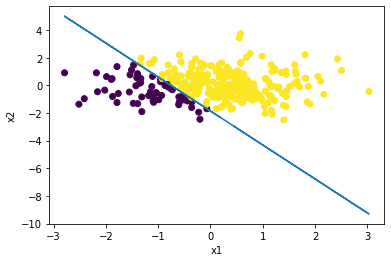

In [355]:
# decision boundary: B0 + B1*x1 + B2*x2 = 0  or  x2 = -B0/B2 - B1/B2*x1

plt.plot(X_test_DS1["x1"] , -p11[0]/+p11[2]-p11[1]/p11[2]*X_test_DS1["x1"])
plt.scatter(X_test_DS1["x1"],X_test_DS1["x2"],c=y_test_DS1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# iii.Using 2 of the best features out of 3 in the 2nd dataset, plot a
# decision boundary in the same way as above.

In [367]:
# In the current run of the program for dataset 2 
# the best model accuracy was achieved was achieved with p32
# As observed from above accuracy table

In [365]:
print("P32:")
print(p32)

P32:
[5.62733998 6.83793767 2.7196447  4.60588948]


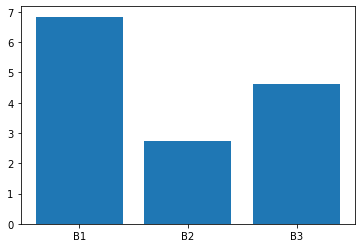

In [358]:
plt.bar(["B1","B2","B3"],[p32[1],p32[2],p32[3]])
plt.show()

In [359]:
# Out of the 3 features B1 and B3 has highest values (hence they have highest p-values)
# hence x1 and x3 are most important features
# Lets retrain model with x1 annd x3

In [360]:
X_train_DS2_new = X_train_DS2.copy()
X_train_DS2_new = X_train_DS2_new.drop(['x2'], axis=1)
print("Training Dataset2 with only 2 features \n")
print(X_train_DS2_new)

Training Dataset2 with only 2 features 

            x1        x3
73    0.828468  0.377299
701   1.177751 -0.099042
1307  1.171715  0.077047
556  -0.275585  0.843387
785  -2.002407 -0.853271
...        ...       ...
715   1.453503  1.139120
905  -0.888603 -0.516722
1096  0.044529 -1.084731
235  -1.291324 -0.472648
1061  0.135804  0.375914

[1200 rows x 2 columns]


In [361]:
X_test_DS2_new = X_test_DS2.copy()
X_test_DS2_new = X_test_DS2_new.drop(['x2'], axis=1)
print("Testing Dataset2 with only 2 features \n")
print(X_test_DS2_new)

Testing Dataset2 with only 2 features 

            x1        x3
91    0.134015  0.624332
75   -2.084333 -0.143184
1264  0.279067 -0.383344
330   0.388284  0.814760
1349  1.385994  0.271802
...        ...       ...
1094 -0.239433 -0.499825
1204 -0.267117  0.283654
1130 -1.848702 -0.782245
12   -0.376086  0.928278
408   0.401801  0.543784

[300 rows x 2 columns]


In [362]:
logistic_reg_DS2_new = LogisticRegression(penalty='l2',tol=1e-2,solver='newton-cg').fit(X_train_DS2_new, y_train_DS2)
p32_new = np.concatenate((np.array(logistic_reg_DS2_new.intercept_),np.array(logistic_reg_DS2_new.coef_).flatten()),axis=0)
print("P32_new: ",p32_new)

P32_new:  [3.13471417 3.88457454 2.57726134]


In [363]:
# Plotting decision boundary with these two features 

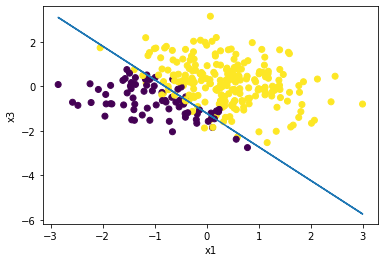

In [369]:
# decision boundary: B0 + B1*x1 + B2*x3 = 0  or  x3 = -B0/B2 - B1/B2*x3

plt.plot(X_test_DS2_new["x1"] , -p32_new[0]/+p32_new[2]-p32_new[1]/p32_new[2]*X_test_DS2_new["x1"])
plt.scatter(X_test_DS2_new["x1"],X_test_DS2_new["x3"],c=y_test_DS2)
plt.xlabel("x1")
plt.ylabel("x3")
plt.show()